# Trabajo Práctico 1: Análisis Exploratorio - Organización de Datos

**Alumnos y Padrón**
+ Craviotto Roitbarg, Mateo Exequiel - 106255 
+ Gómez, Joaquín - 103735

https://github.com/joaqogomez/Organizacion-de-datos-fiuba


## Introducción

En el presente trabajo se propone realizar un análisis de los datos recolectados por una agencia sobre las personas que pagan los impuestos.
El objetivo de la agencia es utilizar la información recolectada para dirigir campañas y poder dirigir a los fiuagentes recaudadores a inspeccionar.


## Objetivos
Los objetivos de este notebook es:
- Entender los datos.
- Ver como se relacionan entre si.
- Poder sacar alguna conclusión o descubrir un patrón.
- Indicar cuáles son los factores más importantes que determinan si una persona tiene altos o bajos ingresos. 
- Armar un baseline.

## Configuraciones Iniciales
Primero, importamos las bibliotecas que vamos a utilizar:

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

## Carga del set de datos
Cargamos el dataset:

In [2]:
with requests.get(
    "https://docs.google.com/spreadsheets/d/1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0/export?format=csv"
) as r, open("Dataset/impuestos.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)
df = pd.read_csv("Dataset/impuestos.csv")

## Limpieza del set de datos

Despues de cargar el dataset, chequeamos que campos tenemos y si tienen valores NULL.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   anios_estudiados                            32561 non-null  int64 
 1   barrio                                      31978 non-null  object
 2   categoria_de_trabajo                        30725 non-null  object
 3   edad                                        32561 non-null  int64 
 4   educacion_alcanzada                         32561 non-null  object
 5   estado_marital                              32561 non-null  object
 6   ganancia_perdida_declarada_bolsa_argentina  32561 non-null  int64 
 7   genero                                      32561 non-null  object
 8   horas_trabajo_registradas                   32561 non-null  int64 
 9   religion                                    32561 non-null  object
 10  rol_familiar_registrad

Se observa que tenemos valores null en las columnas barrio, categoria_de_trabajo y trabajo.

Convierto las variables de tipo object en variables de tipo category:

In [4]:
#Verificamos que nuestra variable target, en este caso tiene_alto_valor_adquisitivo no tenga valores invalidos
df.tiene_alto_valor_adquisitivo.value_counts()
#Se puede ver que solo tiene dos valores disponibles que son 0 y 1 como necesitamos

0    24720
1     7841
Name: tiene_alto_valor_adquisitivo, dtype: int64

In [5]:
df.trabajo.value_counts()

profesional_especializado    4140
reparador                    4099
directivo_gerente            4066
entretenimiento              3770
ventas                       3650
otros                        3295
inspector                    2002
transporte                   1597
limpiador                    1370
sector_primario               994
soporte_tecnico               928
seguridad                     649
servicio_domestico            149
ejercito                        9
Name: trabajo, dtype: int64

In [6]:
df.categoria_de_trabajo.value_counts()

relacion_de_dependencia    22696
monotibutista               2541
empleado_municipal          2093
empleado_provincial         1298
responsable_inscripto       1116
empleadao_estatal            960
trabajo_voluntariado          14
sin_trabajo                    7
Name: categoria_de_trabajo, dtype: int64

In [7]:
df.barrio.value_counts()

Palermo                29170
Belgrano                 643
San Isidro               198
Villa Urquiza            137
Recoleta                 121
La Boca                  114
Agronomia                106
Almagro                  100
Balvanera                 95
Puerto Madero             90
Caballito                 81
Boedo                     80
Barracas                  75
Chacarita                 73
Coghland                  70
Floresta                  67
Constitucion              64
Colegiales                62
Flores                    60
Liniers                   59
Monte Castro              51
Mataderos                 44
Nueva Pompeya             43
Monserrat                 37
nuñez                     34
Parque Chacabuco          31
Parque Avellaneda         29
Villa Luro                29
Parque Chas               28
La Paternal               24
Retiro                    20
Villa Soldati             19
Villa Devoto              19
San Telmo                 18
Villa Real    

In [8]:
df.educacion_alcanzada.value_counts()


4_anio                10501
5_anio                 7291
universidad_3_anio     5355
universidad_4_anio     1723
universidad_1_anio     1382
2_anio                 1175
universidad_2_anio     1067
1_anio                  933
7-8_grado               646
universiada_5_anio      576
9_grado                 514
3_anio                  433
universiada_6_anio      413
5-6_grado               333
1-4_grado               168
preescolar               51
Name: educacion_alcanzada, dtype: int64

In [9]:
df[df['barrio'].isna() & df['trabajo'].isna() &df['tiene_alto_valor_adquisitivo'] == 1]

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
1676,13,NaN,NaN,64,4_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,1,NaN
18615,17,NaN,NaN,27,universidad_3_anio,matrimonio_civil,0,mujer,35,judaismo,casada,1,NaN
25359,17,NaN,NaN,38,universidad_3_anio,matrimonio_civil,7688,mujer,50,otro,casada,1,NaN
26363,14,NaN,NaN,48,5_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,1,NaN


In [10]:
df[(df['ganancia_perdida_declarada_bolsa_argentina'] != 0) & df['categoria_de_trabajo'].isna()]


,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
106,10,Palermo,NaN,17,1_anio,sin_matrimonio,34095,mujer,32,cristianismo,con_hijos,0,NaN
297,18,NaN,NaN,39,universidad_4_anio,matrimonio_civil,3464,mujer,40,budismo,casada,0,NaN
408,14,Palermo,NaN,28,5_anio,matrimonio_civil,-1887,mujer,40,cristianismo,casada,1,NaN
484,12,Palermo,NaN,52,3_anio,sin_matrimonio,594,hombre,40,judaismo,otro,0,NaN
656,9,Palermo,NaN,70,9_grado,viudo_a,1111,mujer,15,cristianismo,soltero_a,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30628,17,Palermo,NaN,65,universidad_3_anio,matrimonio_civil,5556,hombre,48,cristianismo,casado,1,NaN
30781,14,Palermo,NaN,66,5_anio,viudo_a,-4356,mujer,40,judaismo,soltero_a,0,NaN
31062,13,Palermo,NaN,59,4_anio,matrimonio_civil,2407,hombre,60,cristianismo,casado,0,NaN
31605,12,Palermo,NaN,20,3_anio,sin_matrimonio,-1602,hombre,40,otro,sin_familia,0,NaN


Observemos la cantidad de valores nulos para cada feature. Hay valores nulos en las columas 'barrio', 'categoria_de_trabajo' y 'trabajo'.

In [11]:
df.isnull().sum()

anios_estudiados                                 0
barrio                                         583
categoria_de_trabajo                          1836
edad                                             0
educacion_alcanzada                              0
estado_marital                                   0
ganancia_perdida_declarada_bolsa_argentina       0
genero                                           0
horas_trabajo_registradas                        0
religion                                         0
rol_familiar_registrado                          0
tiene_alto_valor_adquisitivo                     0
trabajo                                       1843
dtype: int64

Y estos serían los porcentajes de valores nulos para cada feature:

In [12]:
(df.isnull().mean() * 100).to_frame('porcentaje nulls')

,porcentaje nulls
anios_estudiados,0.000000
barrio,1.790486
categoria_de_trabajo,5.638647
edad,0.000000
educacion_alcanzada,0.000000
estado_marital,0.000000
ganancia_perdida_declarada_bolsa_argentina,0.000000
genero,0.000000
horas_trabajo_registradas,0.000000
religion,0.000000


Si hacemos un análisis de los valores nulos en las columnas categoría de trabajo y trabajo, podemos encontrar una relación entre estas

In [13]:
trabajo_y_categoria_na = df[df['categoria_de_trabajo'].isna() & df['trabajo'].isna()]
print(f"Hay {len(trabajo_y_categoria_na)} filas con valores nulos en trabajo y categoría")

# Hay 1836 filas que tienen NaN en ambas categorías.

sin_trabajo = df[df['categoria_de_trabajo'] == 'sin_trabajo']
sin_trabajo[['categoria_de_trabajo', 'trabajo']]

Hay 1836 filas con valores nulos en trabajo y categoría


,categoria_de_trabajo,trabajo
5361,sin_trabajo,NaN
10845,sin_trabajo,NaN
14772,sin_trabajo,NaN
20337,sin_trabajo,NaN
23232,sin_trabajo,NaN
32304,sin_trabajo,NaN
32314,sin_trabajo,NaN


Eliminamos los que tienen categoria_de_trabajo y trabajo NaN.

In [14]:
df = df.dropna(subset=['categoria_de_trabajo'])
df.isnull().sum()

anios_estudiados                                0
barrio                                        556
categoria_de_trabajo                            0
edad                                            0
educacion_alcanzada                             0
estado_marital                                  0
ganancia_perdida_declarada_bolsa_argentina      0
genero                                          0
horas_trabajo_registradas                       0
religion                                        0
rol_familiar_registrado                         0
tiene_alto_valor_adquisitivo                    0
trabajo                                         7
dtype: int64

Reemplazamos los NaN de la categoría barrio con una categoría llamamda 'No responde'.


In [15]:
df = df.replace(np.nan, {'trabajo': 'desempleado', 'barrio': 'No responde'})
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

anios_estudiados                              0
barrio                                        0
categoria_de_trabajo                          0
edad                                          0
educacion_alcanzada                           0
estado_marital                                0
ganancia_perdida_declarada_bolsa_argentina    0
genero                                        0
horas_trabajo_registradas                     0
religion                                      0
rol_familiar_registrado                       0
tiene_alto_valor_adquisitivo                  0
trabajo                                       0
dtype: int64

In [16]:
def definir_nivel(nivel):
    if nivel.startswith("uni"):
        return "universitario"
    elif nivel.endswith("anio"):
        return "secundario"
    elif nivel.endswith("grado"):
        return "primario"
    else:
        return "jardin"

df['nivel_educativo_alcanzado'] = df['educacion_alcanzada'].apply(definir_nivel)

In [17]:
df.nivel_educativo_alcanzado.value_counts()

secundario       19029
universitario    10154
primario          1496
jardin              46
Name: nivel_educativo_alcanzado, dtype: int64

In [18]:
# Cantidad con alto valor adquisitivo según nivel educativo alcanzado (jardín es 0)
con_alto_valor_adquisitivo = df[df['tiene_alto_valor_adquisitivo'] == 1]
con_alto_valor_adquisitivo.nivel_educativo_alcanzado.value_counts()

universitario    4434
secundario       3132
primario           84
Name: nivel_educativo_alcanzado, dtype: int64

Vamos a revisar que las columnas no numéricas que deberían contener solo caracteres, contengan lo que deberían contener. Obviamos la columna educacion_alcanzada, ya que esta puede tener números, y la columna recientemente agregada, nivel_educativo_alcanzado.

In [19]:
columnas_no_numericas = ['barrio', 'categoria_de_trabajo', 'estado_marital', 'genero', 'religion', 'rol_familiar_registrado', 'trabajo']
for c in columnas_no_numericas:
    print(df[c].str.contains('1|2|3|4|5|6|7|8|9|0|-|#|%|&|!|@').any())      

False
False
False
False
False
False
False


## Análisis de los datos

Para hacer el análisis del set de datos, primero vamos a realizarnos unas preguntas simples a modo de guía, para hacer un desarrollo a partir de estas. Las preguntas que surgieron en este caso son:

- ¿Está el barrio en el que residen las personas relacionado con sus ingresos?
- ¿Existe alguna relacion entre el género de una persona y sus ingresos?
- ¿En qué afecta el nivel de educación alcanzada?
- ¿Es influyente la categoría de trabajo?
- ¿Es directamente proporcional la cantidad de horas trabajadas con el valor adquisitivo de la gente?
- ¿Se debería tener en cuenta la religión?
- ¿Es el tipo de trabajo un factor fundamental para determinar los ingresos de una persona?
- ¿El estado marital influye en nuestra variable objetivo?
- ¿Si un contribuyente declara ganancia/pérdida en la bolsa, afecta esto fuertemente sus ingresos?
- ¿Influye la edad en los ingresos de la persona?
- ¿La cantidad de años estudiados es un factor influyente?
- ¿Es el rol familiar registrado determinante en los ingresos de las personas?


### ¿Hay relación entre el barrio y los ingresos?

Comencemos observando la distribución de los distintos barrios en el dataset.

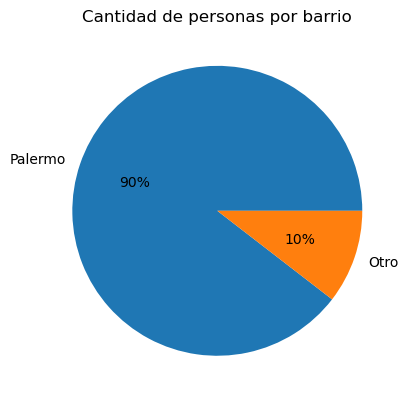

In [20]:
def cambiar_barrio(barrio):
    if barrio == "Palermo":
        return "Palermo"
    else:
        return "Otro"

df_para_grafico_barrio = df.copy()
df_para_grafico_barrio.barrio.value_counts()
df_para_grafico_barrio['barrio'] = df['barrio'].apply(cambiar_barrio)


plt.figure(figsize=(6.4, 4.8), dpi=100)
df_para_grafico_barrio['barrio'].value_counts().iloc[:4].plot(kind='pie', autopct='%1.0f%%')
plt.title('Cantidad de personas por barrio')
plt.ylabel('')
plt.show()

Se puede observar claramente que el barrio predominante es Palermo, el resto fueron agrupados porque su porcentaje es muy bajo. A continuación, vamos a ver como se distribuye la poblacion en estos dos grupos según nuestra variable target.

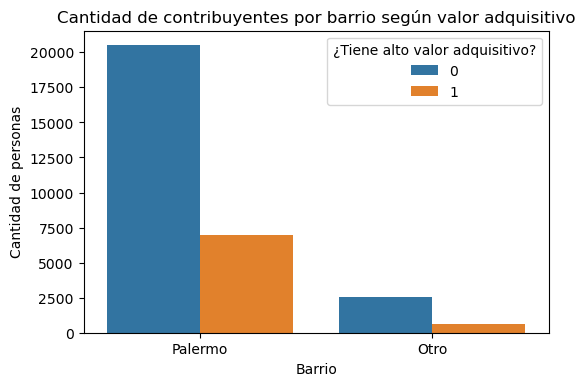

In [72]:
plt.figure(dpi=100)
sns.countplot(data=df_para_grafico_barrio, x='barrio', hue='tiene_alto_valor_adquisitivo', order=df_para_grafico_barrio['barrio'].value_counts().index)
plt.title("Cantidad de contribuyentes por barrio según valor adquisitivo")
plt.ylabel("Cantidad de personas")
plt.xlabel("Barrio")
plt.legend(title="¿Tiene alto valor adquisitivo?")
plt.show()

Podemos observar, que la mayoria de la población de nuestra variable target, se encuentra en el barrio de Palermo, hecho que tiene sentido ya que la mayoria de la población total se encuentra acá. Decidimos igualmente, analizar la categoria que definimos como 'Otro' y ver si hay alguna relación.


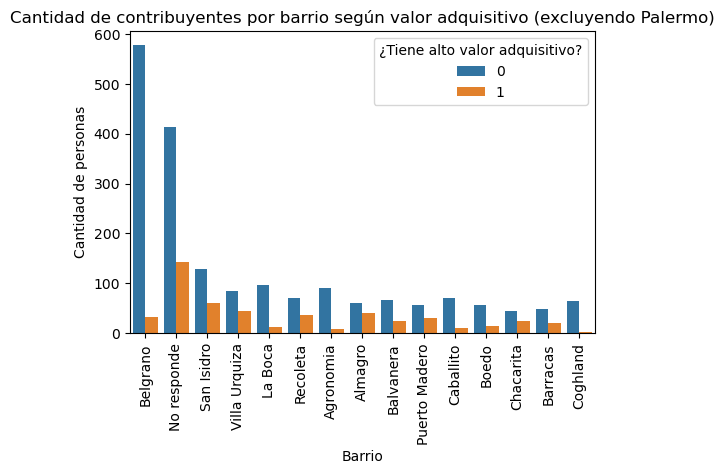

In [74]:
df_sin_palermo = df[df['barrio'] != 'Palermo']
plt.figure(dpi=100)
sns.countplot(data=df_sin_palermo, x='barrio', hue='tiene_alto_valor_adquisitivo',order=df_sin_palermo['barrio'].value_counts().iloc[:15].index)
plt.xticks(rotation=90)
plt.title("Cantidad de contribuyentes por barrio según valor adquisitivo (excluyendo Palermo)")
plt.ylabel("Cantidad de personas")
plt.xlabel("Barrio")
plt.legend(title="¿Tiene alto valor adquisitivo?")
plt.show()

Se puede observar que hay barrios que tienen mayoria de personas con bajo nivel adquisitivo, como por ejemplo Belgrano, La Boca y Coghlan, pero nos parecio que se trataban de muy pocos casos como para tener en cuenta una futura relación en nuestro baseline.


## ¿Existe alguna relacion entre el género de una persona y sus ingresos?

Comenzamos primero por analizar como se distribuye el género en nuestro dataset

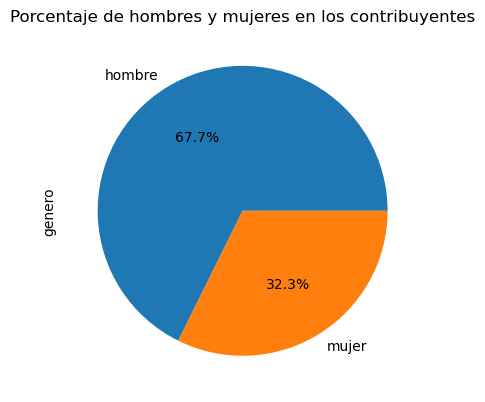

In [21]:
plt.figure(figsize=(6.4, 4.8), dpi=100)
df['genero'].value_counts().plot(kind='pie', autopct='%.01f%%')
plt.title('Porcentaje de hombres y mujeres en los contribuyentes')
plt.show()

El gráfico nos muestra que 2/3 de las personas en nuestro dataset son hombres.

A continuación, nos fijamos como se distribuyen los ingresos según el género:


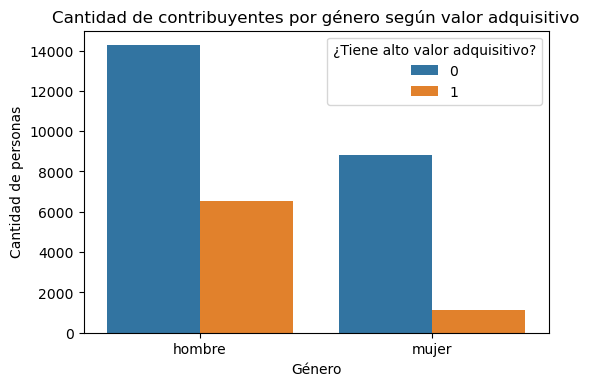

In [78]:
plt.figure(dpi=100)
sns.countplot(data=df, x='genero', hue='tiene_alto_valor_adquisitivo')
plt.title("Cantidad de contribuyentes por género según valor adquisitivo")
plt.ylabel("Cantidad de personas")
plt.xlabel("Género")
plt.legend(title="¿Tiene alto valor adquisitivo?")
plt.show()

Observado este gráfico, consideramos que el género no tiene un gran impacto en los ingresos de la persona.
Lo único que podemos afirmar es que si tenemos alguien de altos ingresos, existe una probabilidad muy alta de que sea una persona de género masculino.

## ¿En qué afecta el nivel de educación alcanzada?

Para ver esta relación, decidimos primero ver como se distribuyen los niveles de educacion alcanzada entre todas las personas:

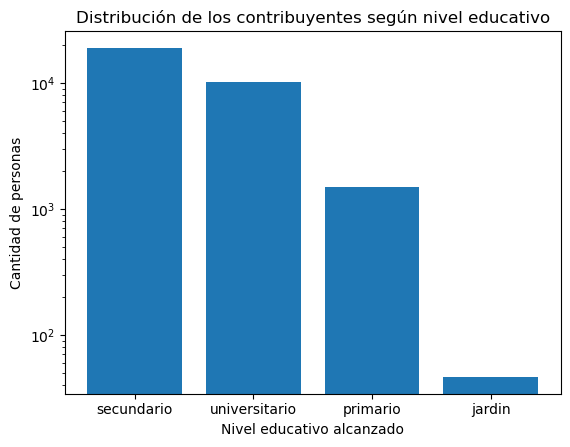

In [24]:
plt.figure(figsize=(6.4, 4.8), dpi=100)
personas_por_nivel_educativo = (df['nivel_educativo_alcanzado'].value_counts().sort_values(ascending=False))
plt.bar(personas_por_nivel_educativo.index, personas_por_nivel_educativo.values)
plt.yscale("log")
plt.ylabel("Cantidad de personas")
plt.xlabel("Nivel educativo alcanzado")
plt.title("Distribución de los contribuyentes según nivel educativo")
plt.show()

Elegimos un gráfico con escala logaritmica, para que se pueda visualizar la cantidad de gente de jardin, ya que con una escala lineal no se podia apreciar correctamente.

Como se puede ver, la mayoría de los contribuyentes alcanzaron una educación de nivel secundario y universitario.
A continuación, vamos a analizar el nivel educativo de las personas con altos ingresos.

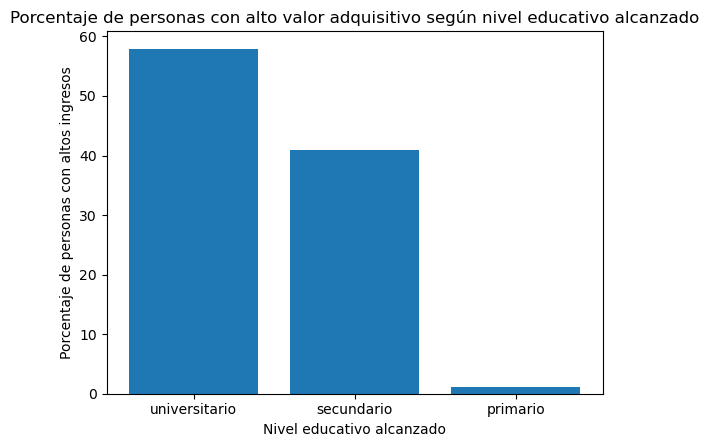

In [25]:
personas_con_alto_valor_adquisitivo = df[df['tiene_alto_valor_adquisitivo'] == 1]

porcentaje_alto_valor_adquisitivo = (
    personas_con_alto_valor_adquisitivo.nivel_educativo_alcanzado.value_counts() / 
    len(personas_con_alto_valor_adquisitivo) * 100
)
plt.figure(figsize=(6.4, 4.8), dpi=100)
plt.ylabel("Porcentaje de personas con altos ingresos")
plt.xlabel("Nivel educativo alcanzado")
plt.title("Porcentaje de personas con alto valor adquisitivo según nivel educativo alcanzado")
plt.bar(porcentaje_alto_valor_adquisitivo.index, porcentaje_alto_valor_adquisitivo.values)
plt.show()

Como podemos observar, el porcentaje de personas con altos ingresos es mayor, cuanto mayor es el nivel educativo alcanzado. Como tenemos un gran porcentaje en secundario, decidimos ver si existe tal relación dentro de esa categoría. No revisamos la categoría universitarios ya que el nivel más alto que se puede alcanzar.

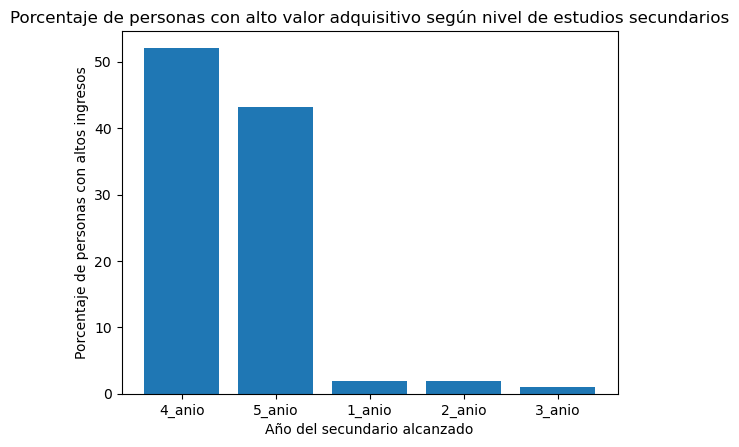

In [26]:
personas_con_alto_valor_adquisitivo = df[(df['tiene_alto_valor_adquisitivo'] == 1) & (df['nivel_educativo_alcanzado'] == "secundario")]

porcentaje_alto_valor_adquisitivo = (
    personas_con_alto_valor_adquisitivo.educacion_alcanzada.value_counts() / 
    len(personas_con_alto_valor_adquisitivo) * 100
)
plt.figure(figsize=(6.4, 4.8), dpi=100)
plt.ylabel("Porcentaje de personas con altos ingresos")
plt.xlabel("Año del secundario alcanzado")
plt.title("Porcentaje de personas con alto valor adquisitivo según nivel de estudios secundarios")
plt.bar(porcentaje_alto_valor_adquisitivo.index, porcentaje_alto_valor_adquisitivo.values)
plt.show()

Se puede ver que los contribuyentes con nivel educativo secundario que poseen altos ingresos pertenecen casi en su totalidad a los dos últimos años del secundario.

Por lo tanto, consideramos ideal dividir el nivel educativo en general en dos categorías llamadas "nivel superior" y "nivel inferior". De esta forma, al segmentar en dos grupos, es más fácil hacer el análisis de relación de  la educación con el valor adquisitivo de los contribuyentes. 

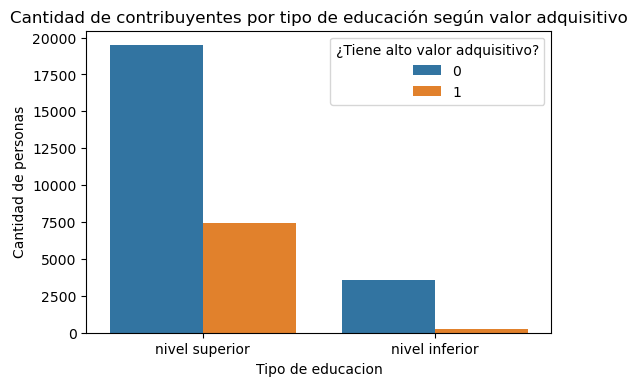

In [136]:
"""def determinar_nivel_educativo(educacion_alcanzada):
    if educacion_alcanzada.startswith("uni"):
        return "nivel superior"
    elif (educacion_alcanzada == "4_anio") | (educacion_alcanzada == "5_anio"):
        return "nivel superior"
    else:
        return "nivel inferior"
    
df['tipo_educacion'] = df['educacion_alcanzada'].apply(determinar_nivel_educativo)
"""
plt.figure(dpi=100)
sns.countplot(data=df, x='tipo_educacion', hue='tiene_alto_valor_adquisitivo')
plt.title("Cantidad de contribuyentes por tipo de educación según valor adquisitivo")
plt.ylabel("Cantidad de personas")
plt.xlabel("Tipo de educacion")
plt.legend(title="¿Tiene alto valor adquisitivo?")
plt.show()

Podemos afirmar que el nivel educativo alcanzado es una variable que tiene importancia a la hora de definir si una persona tiene altos ingresos.

## ¿El estado marital influye en nuestra variable objetivo?

Para ver esta relacion primero decidimos ver como se distribuye la variable en nuestra poblacion:

In [28]:
df.estado_marital.value_counts()

matrimonio_civil      14340
sin_matrimonio         9917
divorciado             4259
separado                959
viudo_a                 840
pareja_no_presente      389
matrimonio_militar       21
Name: estado_marital, dtype: int64

Decidimos juntar los grupos : 
- Las categorías "matrimonio_civil" y "matrimonio_militar" hacerla una sola categoría llamada "matrimonio"
- El resto de las categorías unificarlas en la categoría llamada "sin_matrimonio", ya que representan a personas que no están con otra persona para la ley

Para esto creamos una nueva columna "tiene_matrinomio".


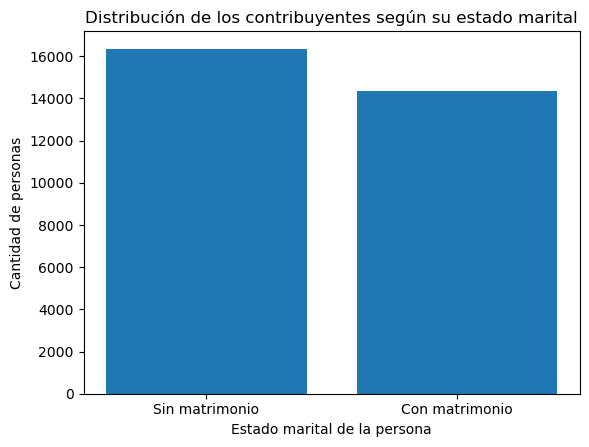

In [29]:
def definir_estado_marital(estado_marital):
    if estado_marital.startswith('matrimonio'):
        return 'Con matrimonio'
    else:
        return 'Sin matrimonio'
    
df['tiene_matrimonio'] = df['estado_marital'].apply(definir_estado_marital)

plt.figure(figsize=(6.4, 4.8), dpi=100)
personas_por_estado_marital = (df['tiene_matrimonio'].value_counts().sort_values(ascending=False))
plt.bar(personas_por_estado_marital.index, personas_por_estado_marital.values)
plt.ylabel("Cantidad de personas")
plt.xlabel("Estado marital de la persona")
plt.title("Distribución de los contribuyentes según su estado marital")
plt.show()

Como se puede ver en el gráfico, nuestra población esta dividida casi de forma equitativa entre los que tienen matrimonio y los que no, siendo estos últimos mayoría por un pequeño margen.

A continuación, revisamos cómo se relaciona esto con nuestra variable target:

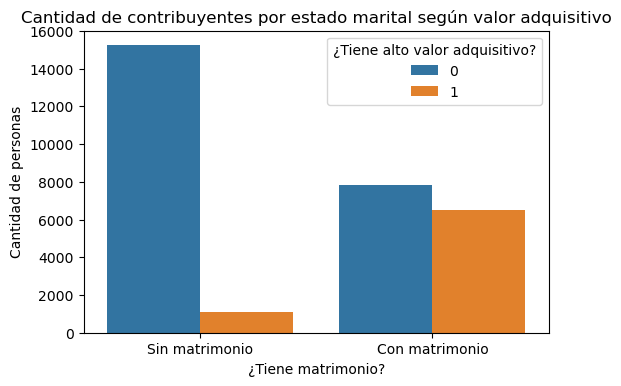

In [92]:
personas_con_alto_valor_adquisitivo = df[df['tiene_alto_valor_adquisitivo'] == 1]
plt.figure(dpi=100)
sns.countplot(data=df, x='tiene_matrimonio', hue='tiene_alto_valor_adquisitivo')
plt.title("Cantidad de contribuyentes por estado marital según valor adquisitivo")
plt.ylabel("Cantidad de personas")
plt.xlabel("¿Tiene matrimonio?")
plt.legend(title="¿Tiene alto valor adquisitivo?")
plt.show()

Se puede observar que existe una relación entre el nivel de ingresos y el estado marital de las personas. La mayoria de las personas sin matrimonio son de ingresos bajos, mientras que en la población con matrimonio se distribuye de forma equitativa.
Además como conclusión, en nuestra variable target, la mayoria de las personas contrajeron matrimonio. Lo mostramos en el siguiente gráfico:

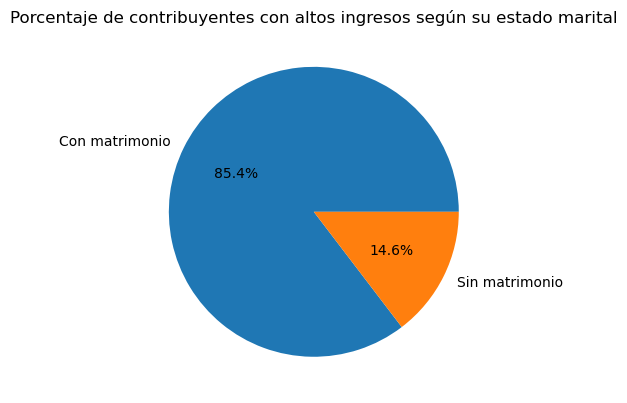

In [93]:
personas_con_alto_valor_adquisitivo = df[df['tiene_alto_valor_adquisitivo'] == 1]
plt.figure(figsize=(6.4, 4.8), dpi=100)
personas_con_alto_valor_adquisitivo.tiene_matrimonio.value_counts().plot(kind='pie', autopct='%.01f%%')
plt.title('Porcentaje de contribuyentes con altos ingresos según su estado marital')
plt.ylabel("")
plt.show()

## ¿Si un contribuyente declara ganancia/pérdida en la bolsa, afecta esto fuertemente sus ingresos?


Analizamos primero un histograma de los resultados en la bolsa de la población en general. Para ello, creemos conveniente segmentar este feature en las categorías: ganancia, pérdida y cero, para ver cómo está distribuido. A partir de estas comenzamos el análisis.

In [37]:
def definir_resultado_en_bolsa(resultado_en_bolsa):
    if resultado_en_bolsa > 0:
        return 'Ganancia'
    elif resultado_en_bolsa < 0:
        return 'Pérdida'
    else:
        return 'Cero'
    
df['resultado_en_bolsa_argentina'] = df['ganancia_perdida_declarada_bolsa_argentina'].apply(definir_resultado_en_bolsa)

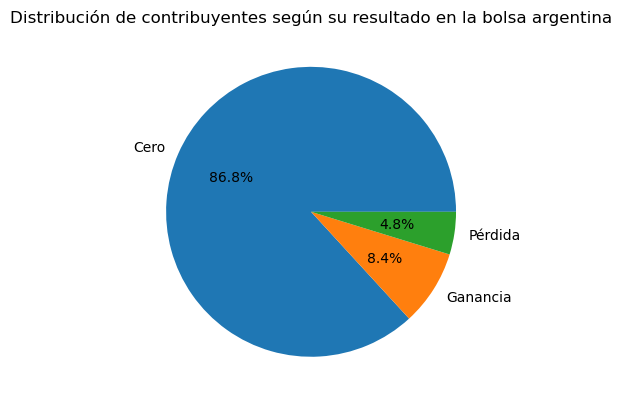

In [38]:
plt.figure(figsize=(6.4, 4.8), dpi=100)
df['resultado_en_bolsa_argentina'].value_counts().plot(kind='pie', autopct='%.01f%%')
plt.title('Distribución de contribuyentes según su resultado en la bolsa argentina')
plt.ylabel("")
plt.show()

Como se puede observar, es clara la predominancia del cero, por lo que la gran mayoría de la población no tuvo ni ganancias ni pérdidas en la bolsa argentina. Decidimos ver si las ganancias y las pérdidas tienen alguna correlación con nuestra variable objetivo, por lo que dejamos a las personas con resultado "Cero" fuera del análisis.

Comenzamos analizando las ganancias en la bolsa.

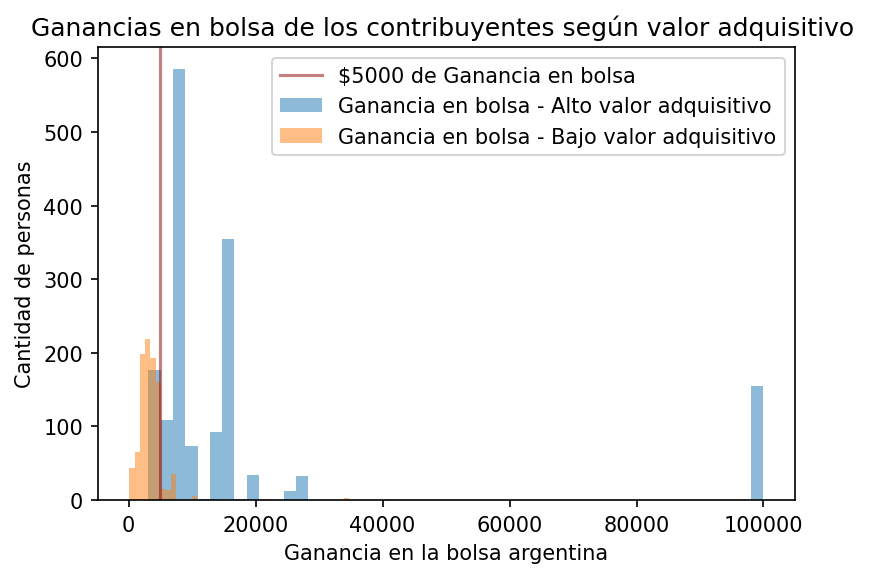

In [96]:
# Ganancia

alto_valor_adquisitivo = df[(df['tiene_alto_valor_adquisitivo'] == 1) & (df['ganancia_perdida_declarada_bolsa_argentina'] > 0)]
bajo_valor_adquisitivo = df[(df['tiene_alto_valor_adquisitivo'] == 0) & (df['ganancia_perdida_declarada_bolsa_argentina'] > 0)]
plt.figure(dpi=150)
plt.hist(
    alto_valor_adquisitivo['ganancia_perdida_declarada_bolsa_argentina'],
    label="Ganancia en bolsa - Alto valor adquisitivo",
    bins=50,
    alpha=0.5

)
plt.hist(
    bajo_valor_adquisitivo['ganancia_perdida_declarada_bolsa_argentina'],
    label="Ganancia en bolsa - Bajo valor adquisitivo",
    bins=50,
    alpha=0.5
)
plt.title("Ganancias en bolsa de los contribuyentes según valor adquisitivo ")
plt.xlabel("Ganancia en la bolsa argentina")
plt.ylabel("Cantidad de personas")
plt.axvline(x=5000, color="darkred", label="$5000 de Ganancia en bolsa", alpha=0.5)
plt.legend()

plt.show()

Podemos ver que hay una evidente división entre los que tienen altos ingresos y los que no. Esta se encuentra aproximadamente a partir de los $5000 de ganancia. Esto es un factor interesante para la predicción del alto valor adquisitivo.

A continuación, analizamos las pérdidas en la bolsa argentina.

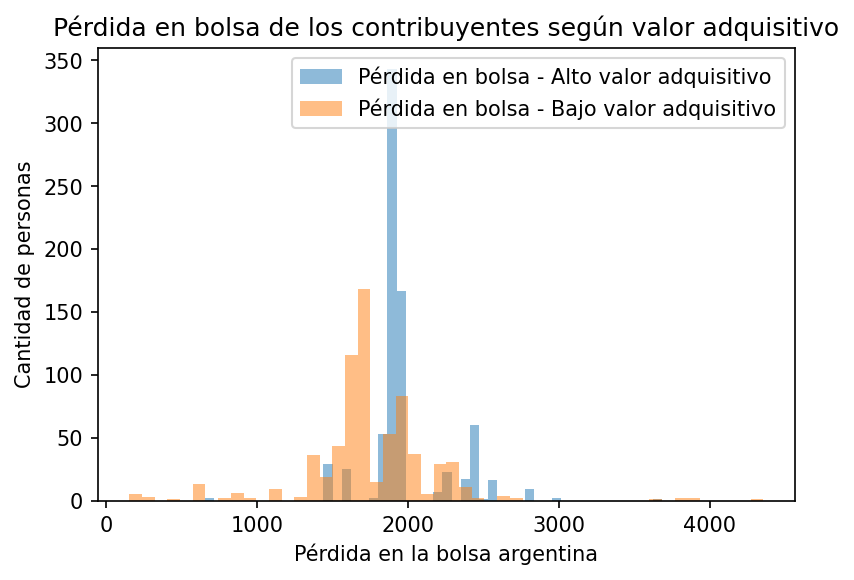

In [98]:
# Pérdida
alto_valor_adquisitivo = df[(df['tiene_alto_valor_adquisitivo'] == 1) & (df['ganancia_perdida_declarada_bolsa_argentina'] < 0)]
bajo_valor_adquisitivo = df[(df['tiene_alto_valor_adquisitivo'] == 0) & (df['ganancia_perdida_declarada_bolsa_argentina'] < 0)]
plt.figure(dpi=150)
plt.hist(
    alto_valor_adquisitivo['ganancia_perdida_declarada_bolsa_argentina'].abs(),
    label="Pérdida en bolsa - Alto valor adquisitivo",
    bins=50,
    alpha=0.5
)
plt.hist(
    bajo_valor_adquisitivo['ganancia_perdida_declarada_bolsa_argentina'].abs(),
    label="Pérdida en bolsa - Bajo valor adquisitivo",
    bins=50,
    alpha=0.5
)
plt.title("Pérdida en bolsa de los contribuyentes según valor adquisitivo")
plt.xlabel("Pérdida en la bolsa argentina")
plt.ylabel("Cantidad de personas")
plt.legend()

plt.show()

En este caso, a diferencia del anterior, no se tiene una clara distinción entre los dos grupos, por lo que no vamos a tomar en cuenta el factor pérdida en la bolsa para el análisis.

## ¿La cantidad de años estudiados es un factor influyente?

Vamos a visualizar primero cómo se distribuye la variable "anios_estudiados" dentro de la población.

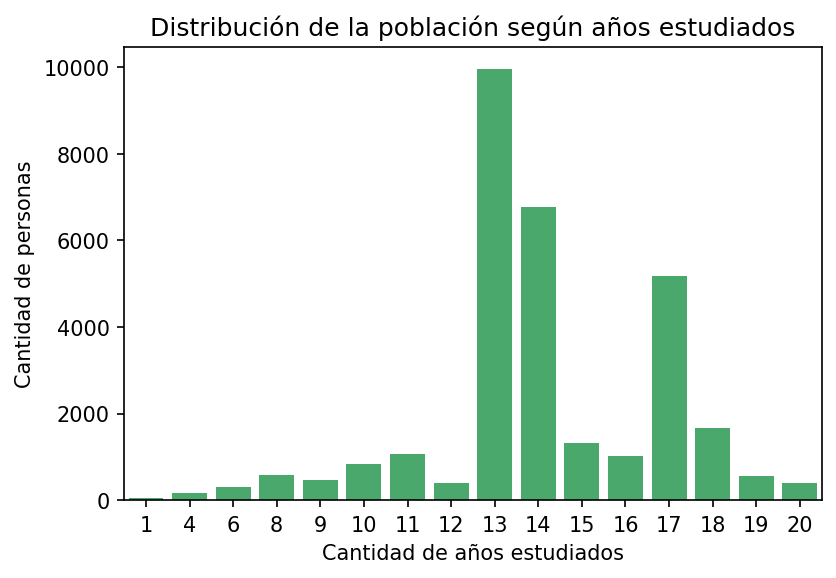

In [99]:
plt.figure(dpi=150)
sns.countplot(data=df, x='anios_estudiados', color=(0.23, 0.72, 0.41))
plt.title("Distribución de la población según años estudiados")
plt.xlabel("Cantidad de años estudiados")
plt.ylabel("Cantidad de personas")
plt.show()

Decidimos ver a continuación si existe alguna relación entre la cantidad de años estudiados y nuestra variable target. Para ello, creemos conveniente agrupar en categorías. Los valores hasta los 10 años los agrupamos en una misma categoría, y el resto los dejamos específicos por año.

Text(0.5, 1.0, 'Cantidad de personas por años estudiados según su nivel de ingresos')

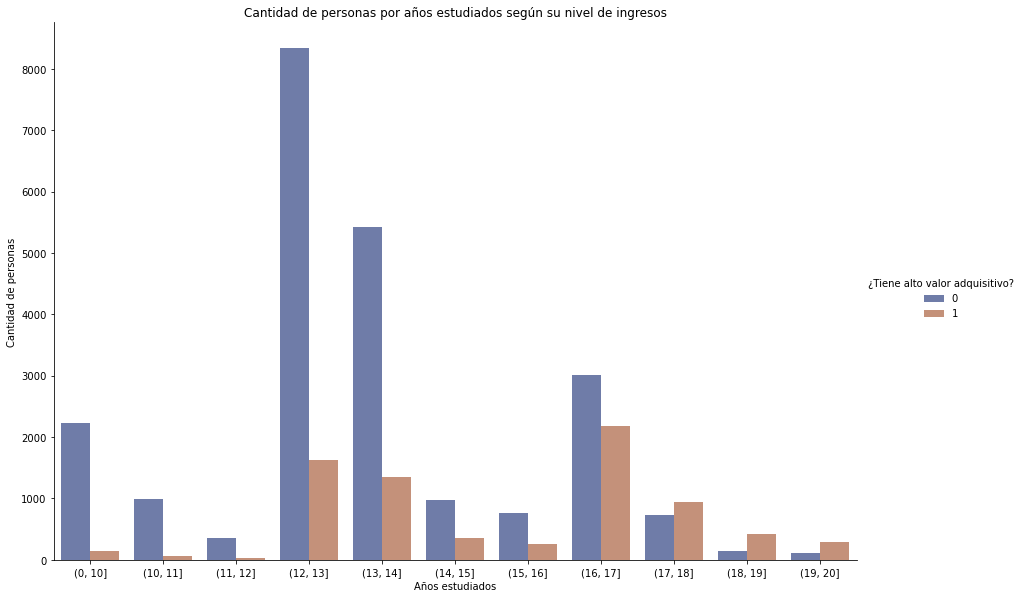

In [107]:
bins = [0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
categorias_anios = pd.cut(df['anios_estudiados'], bins=bins)

tipo_ingresos_por_anios_estudiados = df.groupby(by=categorias_anios)['tiene_alto_valor_adquisitivo'].value_counts()
df_aux = tipo_ingresos_por_anios_estudiados.to_frame()
df_aux.rename(columns={'tiene_alto_valor_adquisitivo':'Cantidad de personas'},inplace=True)
df_aux.reset_index(inplace=True)
df_aux.rename(columns={'tiene_alto_valor_adquisitivo':'¿Tiene alto valor adquisitivo?','anios_estudiados':'Años estudiados'},inplace=True)

sns.catplot(
    data=df_aux, kind="bar",
    x="Años estudiados", y="Cantidad de personas", hue="¿Tiene alto valor adquisitivo?",
    ci=None, palette="dark", alpha=.6, height=8,aspect=1.5
)
plt.title("Cantidad de personas por años estudiados según su nivel de ingresos")

Se puede observar que la mayor cantidad de personas que tienen bajo nivel adquisitivo tienen 14 o menos años de estudio. A su vez, la mayoria de personas con altos ingresos tienen 14 o mas años de estudio. Decidimos mostrar esto en el siguiente gráfico

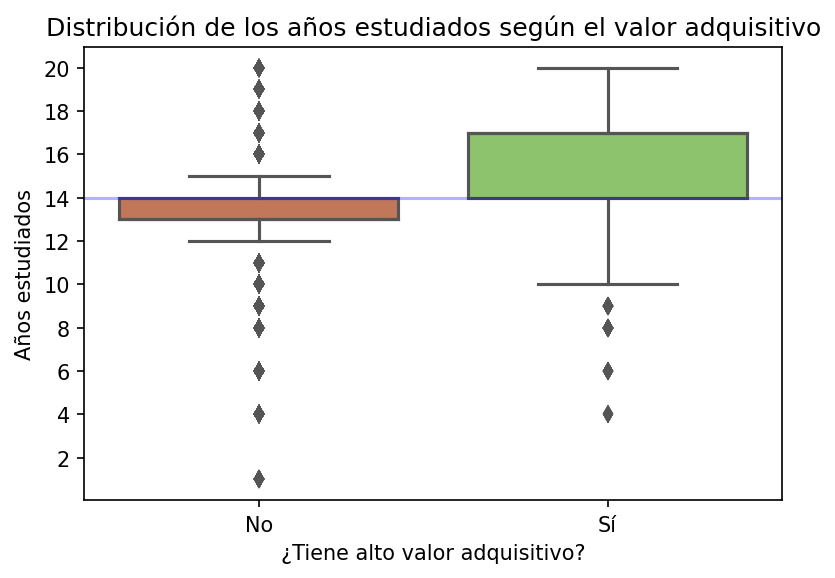

In [147]:
plt.figure(dpi=150)
plt.title("Distribución de los años estudiados según el valor adquisitivo")
sns.boxplot(
    data=df,
    y='anios_estudiados',
    x='tiene_alto_valor_adquisitivo',
    palette=['#D17049', "#89D15E"]
)
plt.ylabel("Años estudiados")
plt.xlabel("¿Tiene alto valor adquisitivo?")
plt.xticks([False, True], ["No", "Sí"])
plt.yticks(np.arange(2, 22, 2).tolist())
plt.axhline(y=14, color="blue", label="14 años de estudio", alpha=0.3)
plt.show()

La linea graficada corresponde con los 14 años de estudio.
Se puede ver con claridad que el cuantil 75(Q3) de la poblacion con bajo valor adquisitivo se encuentra sobre esta linea, mientras que el cuantil 25(Q1) de la poblacion con alto valor adquisitivo se encuentra sobre la misma. Por lo tanto, la mayoria de la poblacion con alto valor adquisitivo tiene mas de 14 años de estudios.

Por lo tanto, la cantidad de años estudiados es un factor influyente en los ingresos de los contribuyentes.


## ¿Se debería tener en cuenta la religión?

Primero comenzamos viendo como se distribuye esta feature en nuestra población.


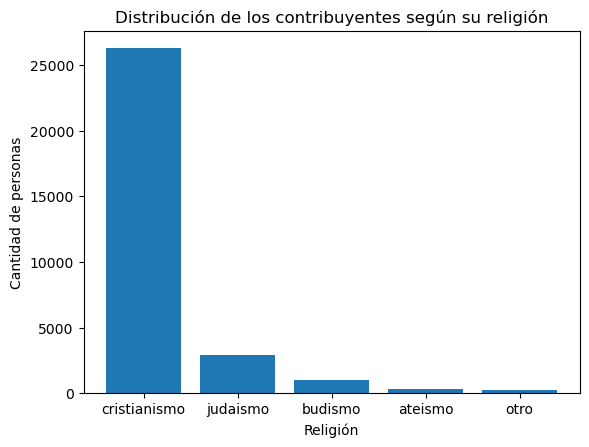

In [152]:
plt.figure(figsize=(6.4, 4.8), dpi=100)
personas_por_religion = (df['religion'].value_counts().sort_values(ascending=False))
plt.bar(personas_por_religion.index, personas_por_religion.values)
plt.ylabel("Cantidad de personas")
plt.xlabel("Religión")
plt.title("Distribución de los contribuyentes según su religión")
plt.show()

Se ve una clara predominancia del cristianismo por sobre las otras religiones, revisamos ahora si tiene una relacion con la variable target.

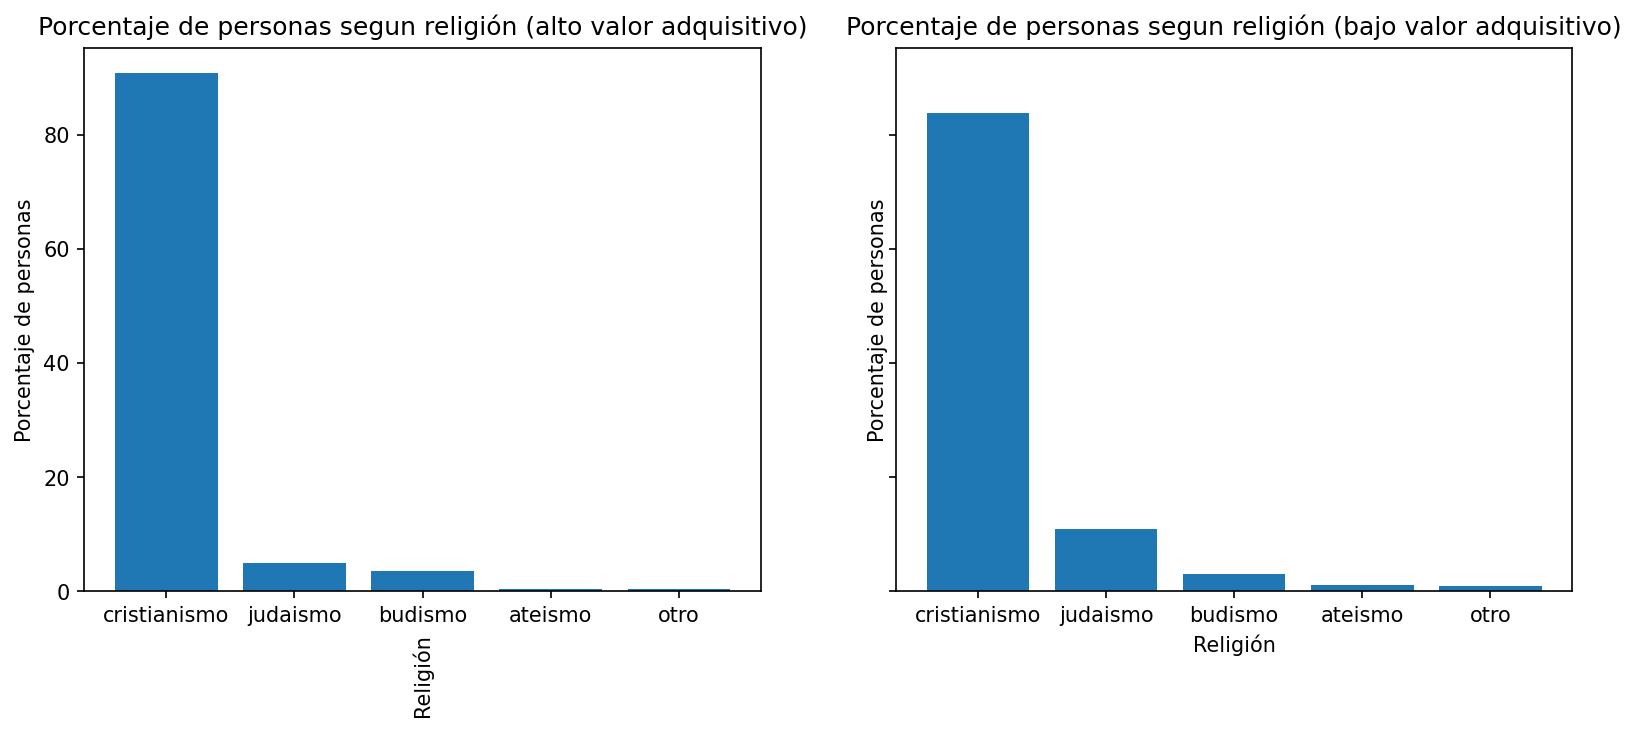

In [178]:
alto_valor_adquisitivo = df[df['tiene_alto_valor_adquisitivo'] == 1]
bajo_valor_adquisitivo = df[df['tiene_alto_valor_adquisitivo'] == 0]

porcentaje_alto_valor_adquisitivo = (
    alto_valor_adquisitivo.religion.value_counts() / 
    len(personas_con_alto_valor_adquisitivo) * 100
)
porcentaje_bajo_valor_adquisitivo = (
    bajo_valor_adquisitivo.religion.value_counts() / 
    len(bajo_valor_adquisitivo) * 100
)

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))

axes[0].bar(porcentaje_alto_valor_adquisitivo.index, porcentaje_alto_valor_adquisitivo.values)
axes[0].set_title("Porcentaje de personas segun religión (alto valor adquisitivo)")
axes[0].set_xlabel("Religión")
axes[0].set_ylabel("Porcentaje de personas")

axes[1].bar(porcentaje_bajo_valor_adquisitivo.index, porcentaje_bajo_valor_adquisitivo.values)
axes[1].set_title("Porcentaje de personas segun religión (bajo valor adquisitivo)")
axes[1].set_xlabel("Religión")
axes[1].set_ylabel("Porcentaje de personas")

plt.show()

Por lo visto en los gráficos, no vemos una diferencia significativa en los porcentajes de personas pertenecientes a cada religión en función de sus ingresos. Por lo tanto, este feature no nos parece importante en el análisis.


## ¿Influye la edad en los ingresos de la persona?

Primero comenzamos viendo como se distribuye la edad en nuestra población según sus niveles de ingreso.

Decidimos agrupar las edades en categorías para lograr una mejor interpretación de las mismas, ya que son demasiados valores diferentes para un gráfico.

Text(0.5, 1.0, 'Cantidad de personas por edad según su nivel de ingresos')

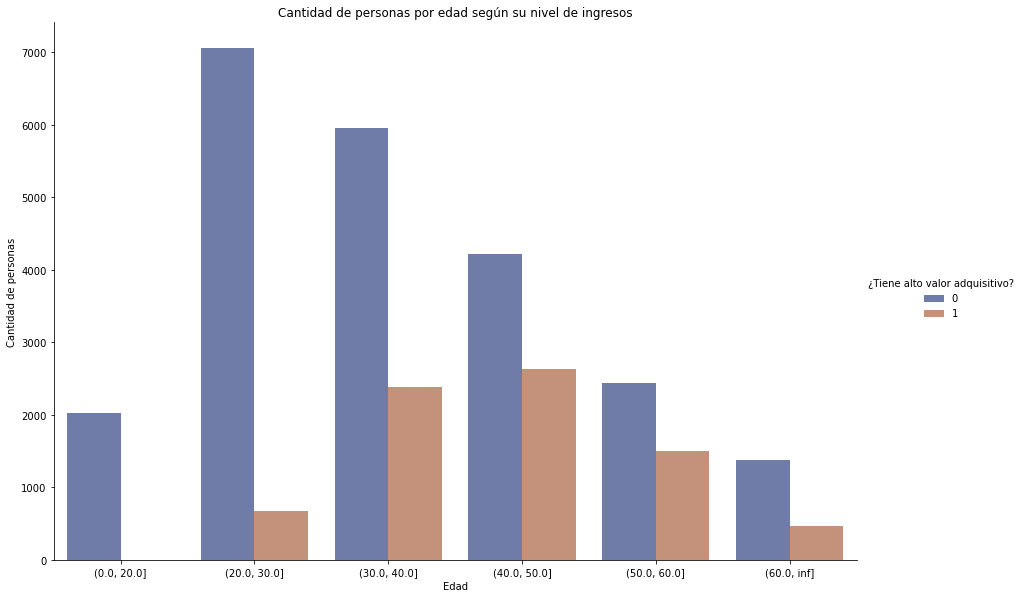

In [125]:
bins = [0, 20, 30, 40, 50, 60, np.inf]
edades = pd.cut(df['edad'], bins=bins)

tipo_ingresos_por_edad = df.groupby(by=edades)['tiene_alto_valor_adquisitivo'].value_counts()
df_aux = tipo_ingresos_por_edad.to_frame()
df_aux.rename(columns={'tiene_alto_valor_adquisitivo':'Cantidad de personas'}, inplace=True)
df_aux.reset_index(inplace=True)
df_aux.rename(columns={'tiene_alto_valor_adquisitivo':'¿Tiene alto valor adquisitivo?','edad':'Edad'},inplace=True)

sns.catplot(
    data=df_aux, kind="bar",
    x="Edad", y="Cantidad de personas", hue="¿Tiene alto valor adquisitivo?",
    ci=None, palette="dark", alpha=.6, height=8,aspect=1.5
)
plt.title("Cantidad de personas por edad según su nivel de ingresos")

Es evidente que a partir de los 30 años de edad se encuentra la mayor cantidad de personas con alto valor adquisitivo. También se observa que los menores a 30 años poseen una gran cantidad de personas con valor adquisitivo bajo. Ambas relaciones pueden llegar a ser importantes para el análisis.

## ¿Es el rol familiar registrado determinante en los ingresos de las personas?

Para determinarlo, vamos a ver la distribución de la población en general, según su rol familiar.

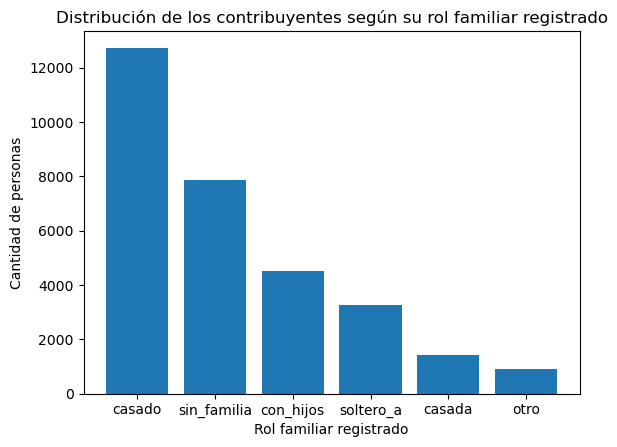

In [126]:
plt.figure(figsize=(6.4, 4.8), dpi=100)
personas_por_rol_familiar = (df['rol_familiar_registrado'].value_counts().sort_values(ascending=False))
plt.bar(personas_por_rol_familiar.index, personas_por_rol_familiar.values)
plt.ylabel("Cantidad de personas")
plt.xlabel("Rol familiar registrado")
plt.title("Distribución de los contribuyentes según su rol familiar registrado")
plt.show()

Creemos conveniente agrupar las categorías casado y casada en una misma, llamada "casado_a".

## ¿Es influyente la categoría de trabajo?

Procedemos a analizar cómo se distribuyen las categorías de trabajo en la población.

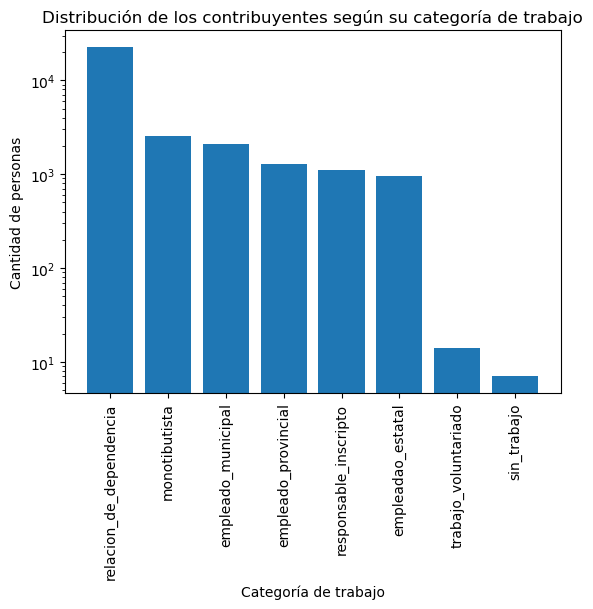

In [131]:
plt.figure(figsize=(6.4, 4.8), dpi=100)
personas_por_categoria = (df['categoria_de_trabajo'].value_counts().sort_values(ascending=False))
plt.bar(personas_por_categoria.index, personas_por_categoria.values)
plt.ylabel("Cantidad de personas")
plt.xlabel("Categoría de trabajo")
plt.title("Distribución de los contribuyentes según su categoría de trabajo")
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

Utilizamos escala logarítmica para visualizar mejor los valores más pequeños. Hay una predominancia de los empleados en relación de dependencia por sobre los demás.

A continuación, observamos el feature dividido por si tiene o no alto valor adquisitivo. No se muestran las categorías "trabajo_voluntariado" y "sin_trabajo" ya que son valores muy bajos.

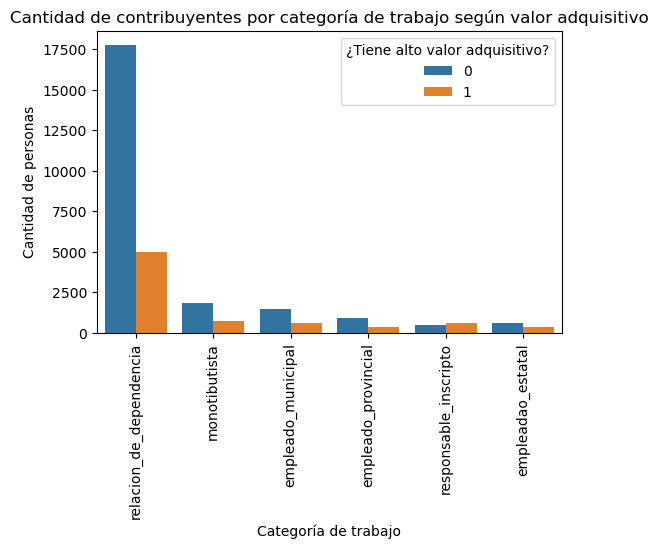

In [177]:
plt.figure(dpi=100)
sns.countplot(
    data=df, x='categoria_de_trabajo', 
    hue='tiene_alto_valor_adquisitivo', 
    order=df['categoria_de_trabajo'].value_counts().iloc[:6].index
)
plt.title("Cantidad de contribuyentes por categoría de trabajo según valor adquisitivo")
plt.ylabel("Cantidad de personas")
plt.xlabel("Categoría de trabajo")
plt.legend(title="¿Tiene alto valor adquisitivo?", loc='upper right')
plt.xticks(rotation=90)
plt.show()

<ipython-input-208-ae20fc7830a1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(porcentaje_bajo_valor_adquisitivo.index, rotation=90)
<ipython-input-208-ae20fc7830a1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(porcentaje_bajo_valor_adquisitivo.index, rotation=90)


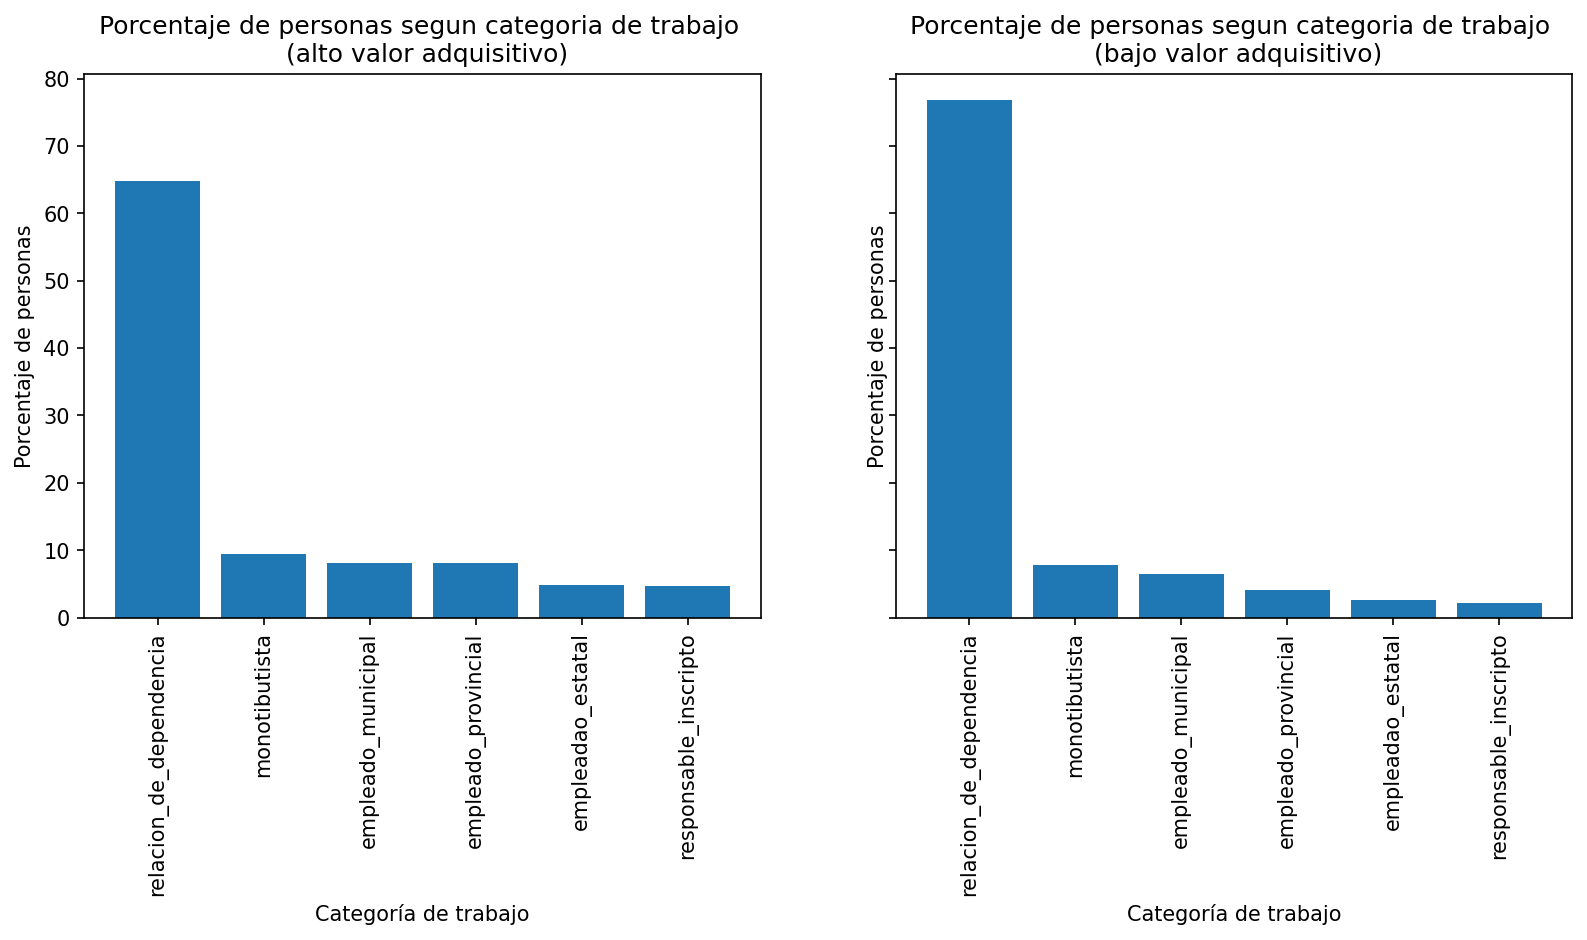

In [208]:
alto_valor_adquisitivo = df[df['tiene_alto_valor_adquisitivo'] == 1]
bajo_valor_adquisitivo = df[df['tiene_alto_valor_adquisitivo'] == 0]

porcentaje_alto_valor_adquisitivo = (
    alto_valor_adquisitivo.categoria_de_trabajo.value_counts().iloc[:6] / 
    len(alto_valor_adquisitivo) * 100
)
porcentaje_bajo_valor_adquisitivo = (
    bajo_valor_adquisitivo.categoria_de_trabajo.value_counts().iloc[:6] / 
    len(bajo_valor_adquisitivo) * 100
)

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, dpi=150, figsize=(6.4 * 2, 4.8))

axes[0].bar(porcentaje_alto_valor_adquisitivo.index, porcentaje_alto_valor_adquisitivo.values)
axes[0].set_title("Porcentaje de personas segun categoria de trabajo \n (alto valor adquisitivo)")
axes[0].set_xlabel("Categoría de trabajo")
axes[0].set_ylabel("Porcentaje de personas")
axes[0].set_xticklabels(porcentaje_bajo_valor_adquisitivo.index, rotation=90)


axes[1].bar(porcentaje_bajo_valor_adquisitivo.index, porcentaje_bajo_valor_adquisitivo.values)
axes[1].set_title("Porcentaje de personas segun categoria de trabajo \n (bajo valor adquisitivo)")
axes[1].set_xlabel("Categoría de trabajo")
axes[1].set_ylabel("Porcentaje de personas")
axes[1].set_xticklabels(porcentaje_bajo_valor_adquisitivo.index, rotation=90)


plt.show()


Se ve un descenso en la cantidad de personas en relación de dependencia, sin embargo, el gráfico no aporta la suficiente información como para determinar si influye o no en la variable target, ya que los contribuyentes se distribuyen de forma similar en ambos casos.

## ¿Es el tipo de trabajo un factor fundamental para determinar los ingresos de una persona?

Vamos a analizar los distintos trabajos dentro de la población.

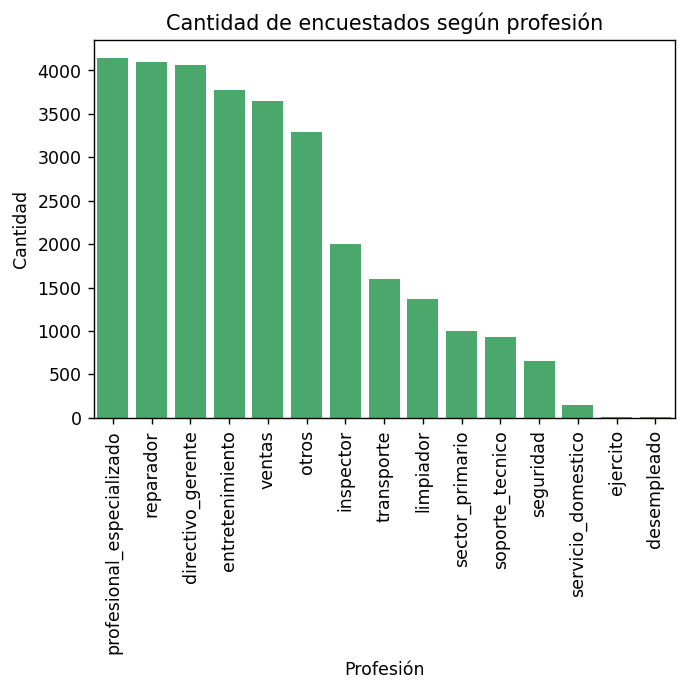

In [205]:
plt.figure(dpi=125)
sns.countplot(
    x="trabajo",
    data=df,
    order=df["trabajo"].value_counts().index,
    color=(0.23, 0.72, 0.41),
)
plt.ylabel("Cantidad")
plt.xlabel("Profesión")
plt.title("Cantidad de encuestados según profesión")
plt.xticks(rotation=90)
plt.show()

<ipython-input-218-71a201164939>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(porcentaje_bajo_valor_adquisitivo.index.sort_values(), rotation=90)
<ipython-input-218-71a201164939>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(labels, rotation=90)


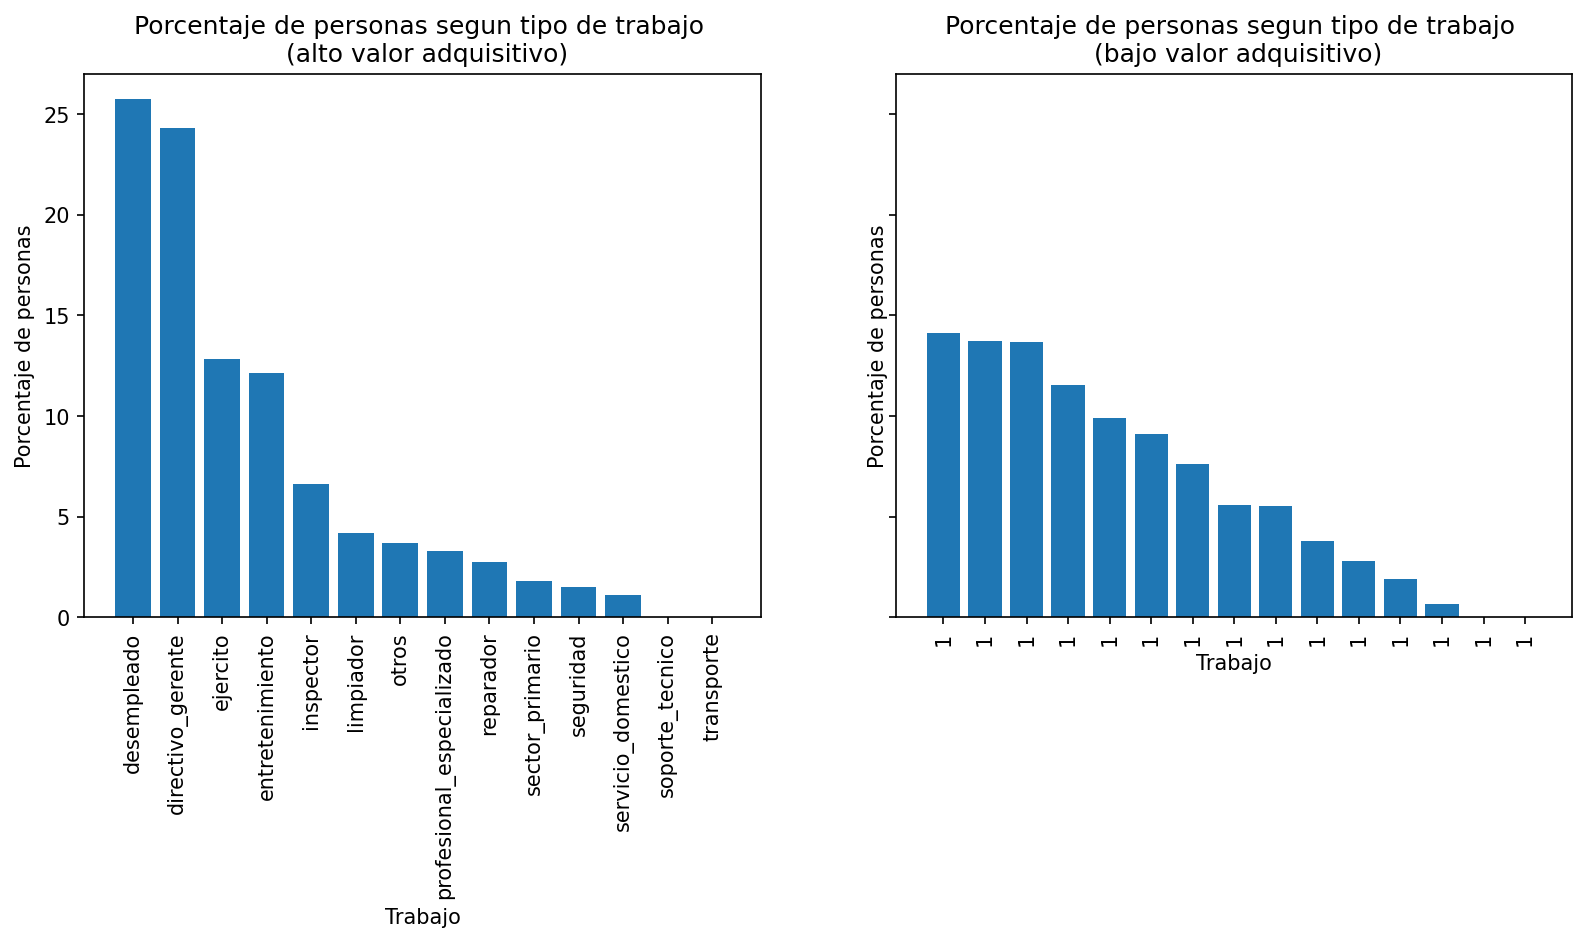

In [124]:
from sklearn.metrics import accuracy_score, roc_auc_score

pred = pd.Series(np.zeros(len(df)))
pred[(df.ganancia_perdida_declarada_bolsa_argentina > 5000)] = 1
pred[(df.anios_estudiados > 14) & (df.tiene_matrimonio == 'Con matrimonio') & (df.edad > 30)] = 1
print(pred.value_counts())
accuracy_score(df.tiene_alto_valor_adquisitivo, pred)

0.0    25046
1.0     5679
dtype: int64


0.8351505288852725